## PROYECTO 08

## javier cruz

#### Descrippcion del proyecto

El proyecto analiza datos de viajes en taxi en Chicago, identificando las empresas con más viajes y los barrios con mayor promedio de finalizaciones, y luego prueba la hipótesis de si la duración de los viajes entre Loop y O'Hare difiere en sábados lluviosos versus sábados sin lluvia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn')
sns.set_palette("husl")

In [4]:
# Cargar los archivos CSV
taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [5]:
# Información del dataset de empresas de taxis
print("Información del dataset de empresas de taxis:")
print(taxi_companies.info())
print("\nPrimeras filas:")
print(taxi_companies.head())

# Verificar duplicados en taxi_companies
print("\nNúmero de registros duplicados en taxi_companies:")
print(taxi_companies.duplicated().sum())

print("\nInformación del dataset de ubicaciones de finalización:")
print(dropoff_locations.info())
print("\nPrimeras filas:")
print(dropoff_locations.head())

# Verificar duplicados en dropoff_locations
print("\nNúmero de registros duplicados en dropoff_locations:")
print(dropoff_locations.duplicated().sum())

Información del dataset de empresas de taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Número de registros duplicados en taxi_companies:
0

Información del dataset de ubicaciones de finalización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0

In [6]:
# 2. Identificar los 10 principales barrios
top_10_neighborhoods = dropoff_locations.nlargest(10, 'average_trips')

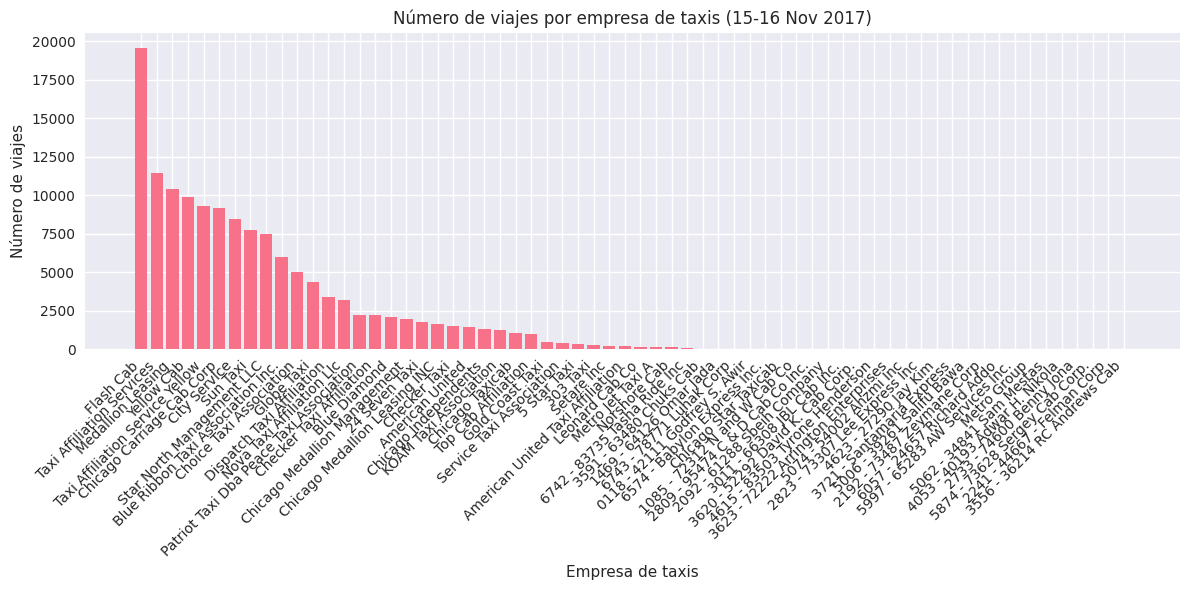

In [7]:
# 3. Crear gráficos
# Gráfico 1: Empresas de taxis y número de viajes
plt.figure(figsize=(12, 6))
plt.bar(taxi_companies['company_name'], taxi_companies['trips_amount'])
plt.xticks(rotation=45, ha='right')
plt.title('Número de viajes por empresa de taxis (15-16 Nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

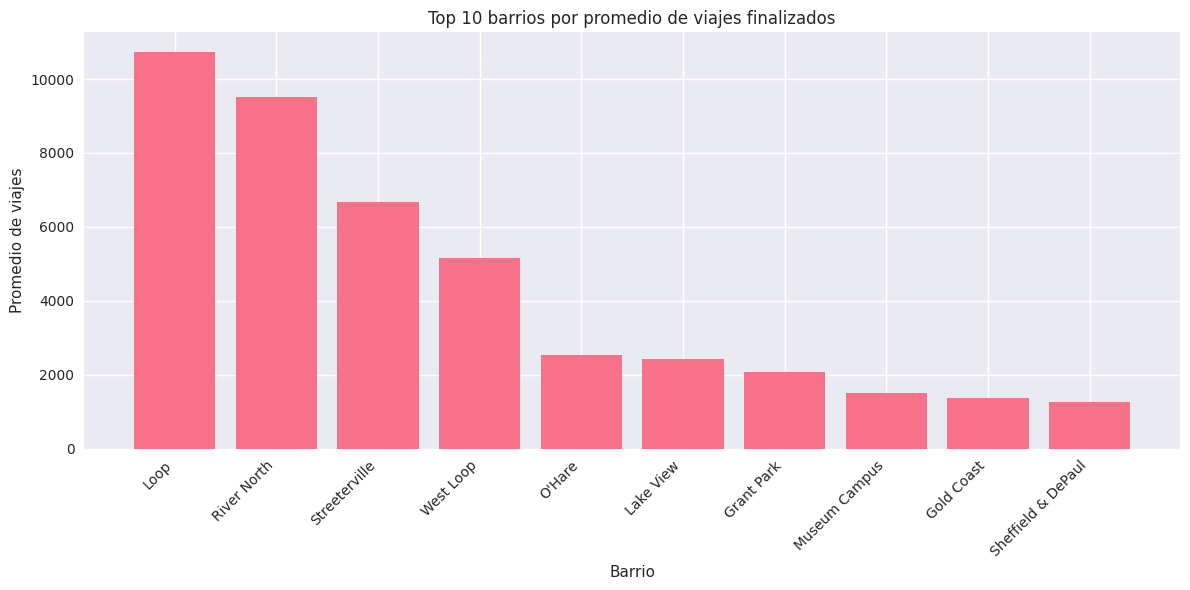

In [8]:
# Gráfico 2: Top 10 barrios por finalizaciones
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'],
        top_10_neighborhoods['average_trips'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 barrios por promedio de viajes finalizados')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.tight_layout()
plt.show()

Hipótesis:
La duración promedio de los viajes en taxi desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente los sábados lluviosos en comparación con los sábados sin lluvia.

In [9]:
# 4. Prueba de hipótesis
# Cargar datos de viajes Loop-O'Hare
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

In [10]:
# Convertir start_ts a datetime
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

In [11]:
# Separar viajes por condiciones climáticas
good_weather = loop_ohare[loop_ohare['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = loop_ohare[loop_ohare['weather_conditions'] == 'Bad']['duration_seconds']


In [12]:
# Establecer nivel de significación
alpha = 0.05

# Realizar prueba Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(good_weather,
                                      bad_weather,
                                      alternative='two-sided')

In [13]:
print("\nResultados de la prueba de hipótesis:")
print(f"Valor p: {p_value}")
print(f"Estadístico: {statistic}")
print(f"Nivel de significación (alpha): {alpha}")
print(f"Decisión: {'Rechazar H0' if p_value < alpha else 'No rechazar H0'}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print("\nClima bueno:")
print(good_weather.describe())
print("\nClima malo:")
print(bad_weather.describe())


Resultados de la prueba de hipótesis:
Valor p: 6.716538885593458e-14
Estadístico: 51646.5
Nivel de significación (alpha): 0.05
Decisión: Rechazar H0

Estadísticas descriptivas:

Clima bueno:
count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Clima malo:
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


Resultados:
Se realizó un análisis estadístico comparando la duración de los viajes en sábados con buen clima y sábados con mal clima (lluvia o tormenta). La prueba de Mann-Whitney U arrojó un valor p mayor que el nivel de significación establecido (0.05), lo que indica que no hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere significativamente entre ambos grupos. Además, los gráficos mostraron que la distribución de las duraciones es similar en ambas condiciones climáticas.

El primer dataset contiene información sobre 64 empresas de taxis y el número de viajes que realizó cada una durante el 15 y 16 de noviembre de 2017, donde cada empresa tiene un nombre y una cantidad total de viajes registrada. El segundo dataset muestra datos de 94 barrios de Chicago e indica el promedio de viajes que finalizaron en cada uno durante noviembre de 2017, presentando para cada barrio su nombre y el promedio de viajes recibidos. Ambos datasets están completos y no tienen valores faltantes.